<a href="https://colab.research.google.com/github/Ofir-Manor/Long1/blob/main/316084623-311288203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.pyplot import matplotlib
import pylab
from sklearn.model_selection import train_test_split
params = {'xtick.labelsize': 18, 'ytick.labelsize': 18, 'axes.titlesize' : 22, 'axes.labelsize' : 20, 'legend.fontsize': 18, 'legend.title_fontsize': 22, 'figure.titlesize': 24 }
pylab.rcParams.update(params)

In [2]:
'''!rm *.csv

from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]'''

'!rm *.csv\n\nfrom google.colab import files\nprint("Please load the raw csv data")\nuploadedData = files.upload()\nfilename = list(uploadedData)[0]'

Part 1: Data loading and First Look

In [3]:
virus_data = pd.read_csv("virus_data.csv")
virus_df = pd.DataFrame(data=virus_data)
virus_df.shape

(1250, 26)

In [4]:
virus_df['num_of_siblings'].value_counts()

1    399
2    317
0    271
3    161
4     62
5     31
6      6
7      2
8      1
Name: num_of_siblings, dtype: int64

Partitioning the Data

In [5]:
rand_seed = 23 + 3
train, test = train_test_split(virus_df, test_size=0.2, random_state=rand_seed)

Part2: Warming up with k-Nearest Neighbors

Basic Data Exploration

In [6]:
train.corr().spread.PCR_01

0.08301882503960864

In [7]:
train.corr().spread.PCR_02

0.4788563994550575

In [8]:
train.corr().spread.PCR_09

-0.04155539143381472

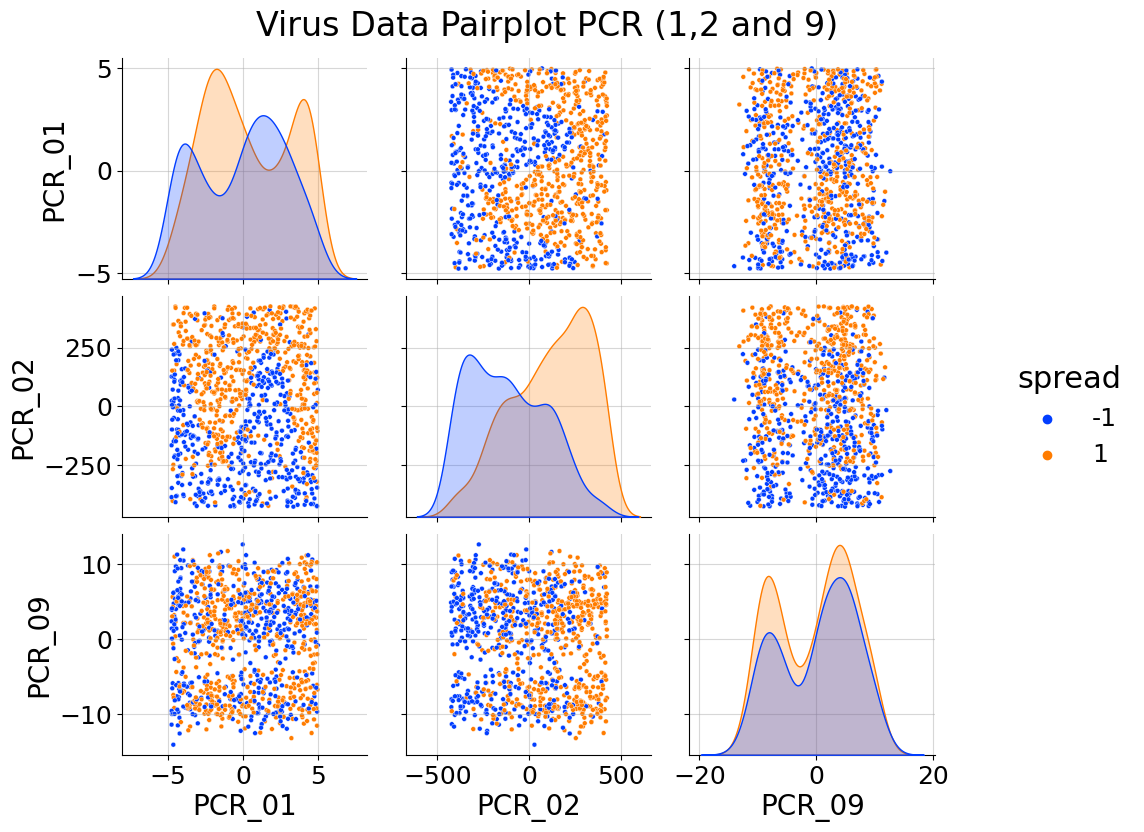

In [9]:
g=sns.pairplot(data=train, hue="spread", palette="bright", vars=["PCR_01", "PCR_02", "PCR_09"], plot_kws={"s": 12})
g.fig.suptitle("Virus Data Pairplot PCR (1,2 and 9)", y=1.04)
for ax in np.ravel(g.axes):
 ax.grid(alpha=0.5)
g.fig.set_size_inches(12,8)

k-NN Implementation

In [10]:
from sklearn.base import BaseEstimator,ClassifierMixin
import scipy
from knn import kNN

In [11]:
'''class kNN(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors:int = 3):
        self.n_neighbors = n_neighbors
    def fit(self, X, y):
        # TODO: complete
        self.X = np.copy(X)
        self.y = np.copy(y)
        return self
    def predict(self, X):
        # Note: You can use self.n_neighbors here
        predictions = None
        # TODO: compute the predicted labels (+1 or -1)
        dist_mat = scipy.spatial.distance.cdist(XA=X, XB=self.X)
        sort_dist_idx = np.argpartition(a=dist_mat, kth=self.n_neighbors, axis=1)
        pred_sum = np.sum(self.y[sort_dist_idx][:, 0:self.n_neighbors], axis=1)
        predictions = np.where(pred_sum>0, 1, -1)
        return predictions'''

'class kNN(BaseEstimator, ClassifierMixin):\n    def __init__(self, n_neighbors:int = 3):\n        self.n_neighbors = n_neighbors\n    def fit(self, X, y):\n        # TODO: complete\n        self.X = np.copy(X)\n        self.y = np.copy(y)\n        return self\n    def predict(self, X):\n        # Note: You can use self.n_neighbors here\n        predictions = None\n        # TODO: compute the predicted labels (+1 or -1)\n        dist_mat = scipy.spatial.distance.cdist(XA=X, XB=self.X)\n        sort_dist_idx = np.argpartition(a=dist_mat, kth=self.n_neighbors, axis=1)\n        pred_sum = np.sum(self.y[sort_dist_idx][:, 0:self.n_neighbors], axis=1)\n        predictions = np.where(pred_sum>0, 1, -1)\n        return predictions'

In [12]:
temp_df=pd.DataFrame(data=train, columns=["PCR_01", "PCR_02", "spread"])
temp_train, temp_test = train_test_split(temp_df, test_size=0.2, random_state=rand_seed)
temp_train_x = temp_train[["PCR_01", "PCR_02"]]
temp_train_y = temp_train["spread"]
temp_test_x = temp_test[["PCR_01", "PCR_02"]]
temp_test_y = temp_test["spread"]
model = kNN(n_neighbors=1)
model.fit(X=temp_train_x, y=temp_train_y)

kNN(n_neighbors=1)

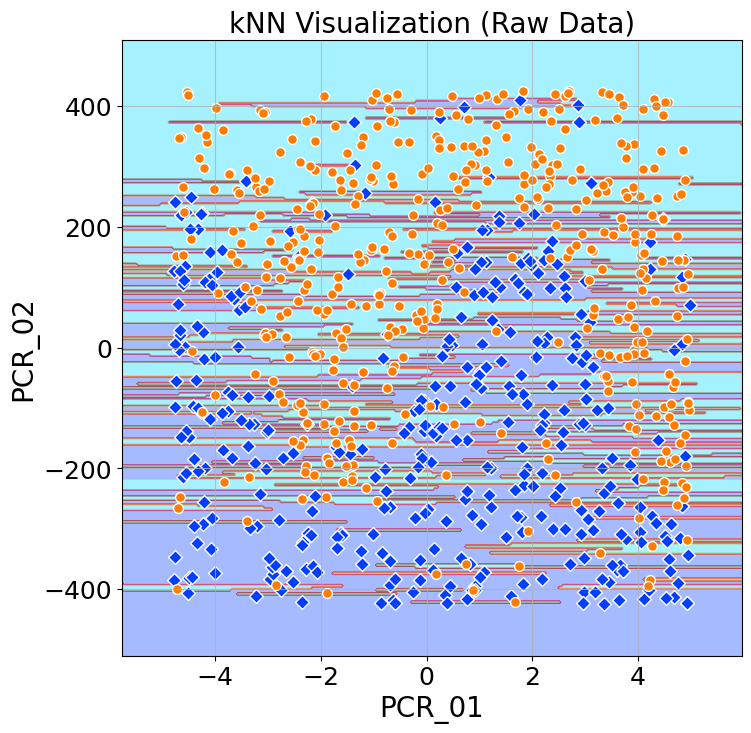

In [13]:
from visualize_clf import visualize_clf
visualize_clf(clf=model, X=temp_train_x.to_numpy(), Y=temp_train_y, title="kNN Visualization (Raw Data)", xlabel="PCR_01", ylabel="PCR_02")

In [14]:
a = model.score(temp_train_x, temp_train_y)
b = model.score(temp_test_x, temp_test_y)
print(f"The score on the training set is {a}")
print(f"The score on the test set is {b}")

The score on the training set is 1.0
The score on the test set is 0.72


Data Normalization

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [16]:
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
train_x_min_max = min_max_scaler.fit_transform(temp_train_x)
test_x_min_max = min_max_scaler.fit_transform(temp_test_x)
model.fit(X=train_x_min_max, y=temp_train_y)

kNN(n_neighbors=1)

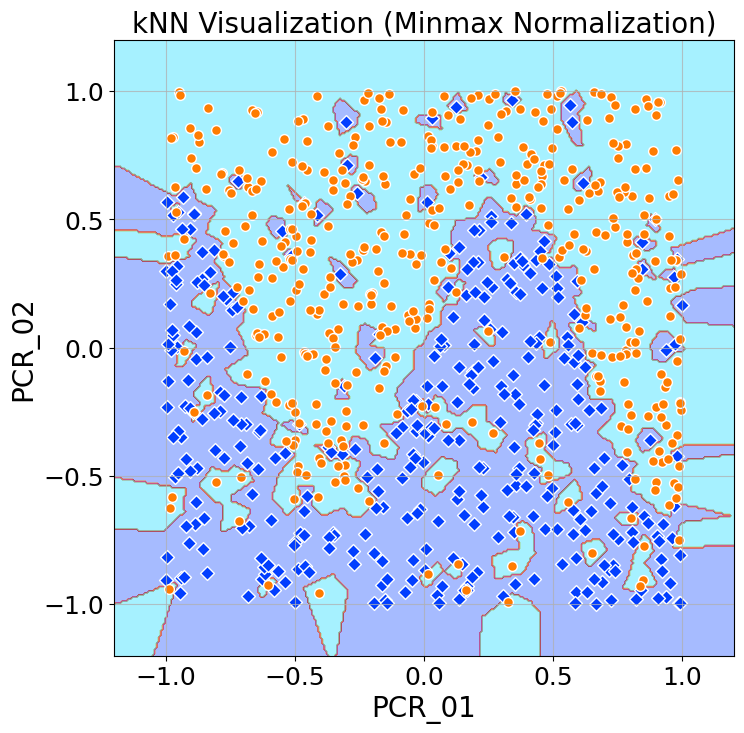

In [17]:
visualize_clf(clf=model, X=train_x_min_max, Y=temp_train_y, title="kNN Visualization (Minmax Normalization)", xlabel="PCR_01", ylabel="PCR_02")

In [18]:
a = model.score(train_x_min_max, temp_train_y)
b = model.score(test_x_min_max, temp_test_y)
print(f"The score on the training set is {a}")
print(f"The score on the test set is {b}")

The score on the training set is 1.0
The score on the test set is 0.785


In [19]:
std_scaler = StandardScaler()
train_x_std = std_scaler.fit_transform(temp_train_x)
test_x_std = std_scaler.fit_transform(temp_test_x)
std_model = kNN(n_neighbors=7)
std_model.fit(X=train_x_std, y=temp_train_y)

kNN(n_neighbors=7)

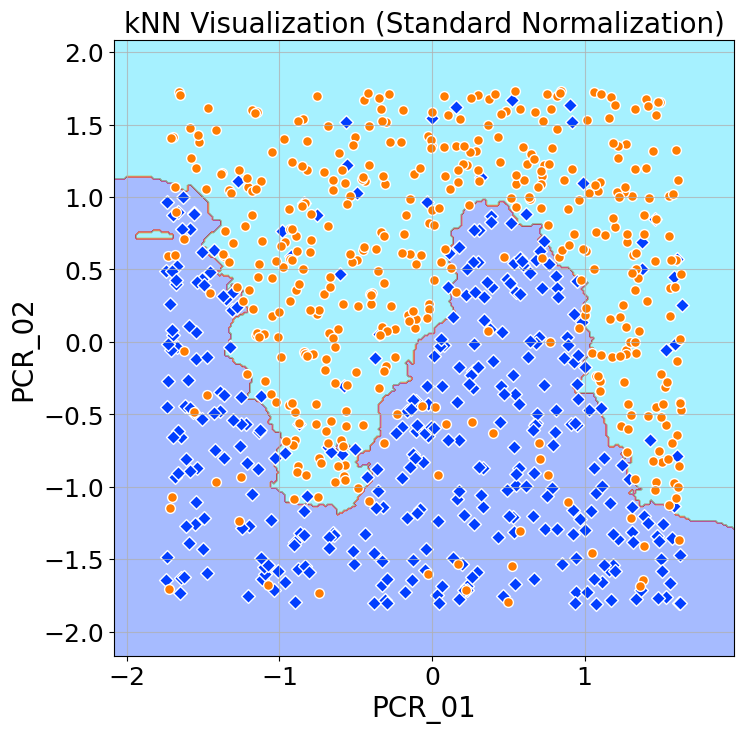

In [20]:
visualize_clf(clf=std_model, X=train_x_std, Y=temp_train_y, title="kNN Visualization (Standard Normalization)", xlabel="PCR_01", ylabel="PCR_02")

In [21]:
a = model.score(train_x_std,temp_train_y)
b = model.score(test_x_std, temp_test_y)
print(f"The score on the training set is {a}")
print(f"The score on the test set is {b}")

The score on the training set is 0.68375
The score on the test set is 0.65
